In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'тренувальних послідовностей')
print(len(input_test), 'тестових послідовностей')

17464789/17464789 [==============================] - 1s 0us/step
25000 тренувальних послідовностей
25000 тестових послідовностей


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


будуємо RNN - модель

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 83s 583ms/step - loss: 0.6416 - acc: 0.6154 - val_loss: 0.5228 - val_acc: 0.7467
Epoch 2/5
137/137 [==============================] - 77s 561ms/step - loss: 0.4255 - acc: 0.8140 - val_loss: 0.3910 - val_acc: 0.8327
Epoch 3/5
137/137 [==============================] - 73s 532ms/step - loss: 0.3179 - acc: 0.8721 - val_loss: 0.3947 - val_acc: 0.8252
Epoch 4/5
137/137 [==============================] - 73s 534ms/step - loss: 0.2622 - acc: 0.8958 - val_loss: 0.3564 - val_acc: 0.8581
Epoch 5/5
137/137 [==============================] - 72s 529ms/step - loss: 0.2004 - acc: 0.9250 - val_loss: 0.4529 - val_acc: 0.8113


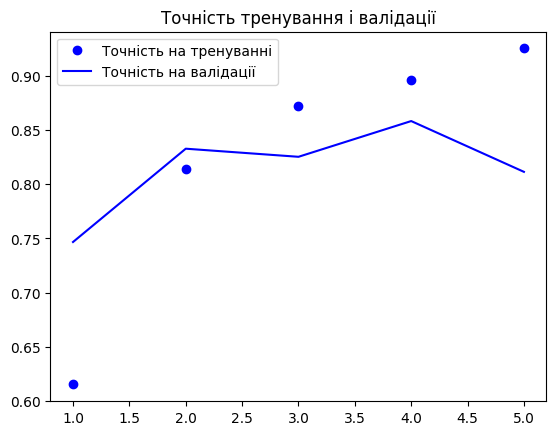

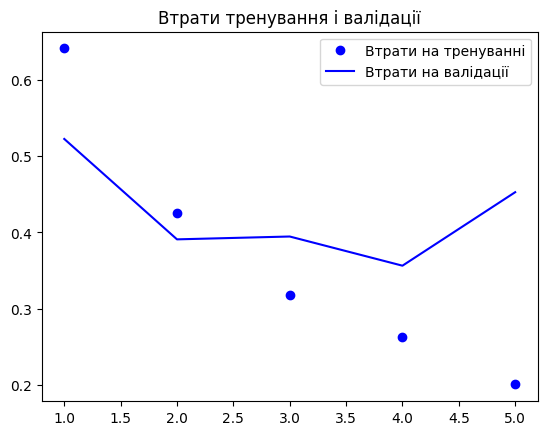

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [10]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, перетворюємо в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння виведемо деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 [==============================] - 37s 47ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 36s 46ms/step - loss: 0.4636 - acc: 0.7988
Test Loss: 0.46363386511802673
Test Accuracy: 0.798799991607666


Будуємо LSTM - модель

In [11]:
from keras.layers import LSTM

In [12]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [13]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [14]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [15]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 15s 98ms/step - loss: 0.6388 - acc: 0.6394 - val_loss: 0.4798 - val_acc: 0.7961
Epoch 2/5
137/137 [==============================] - 11s 81ms/step - loss: 0.3997 - acc: 0.8326 - val_loss: 0.3368 - val_acc: 0.8591
Epoch 3/5
137/137 [==============================] - 12s 85ms/step - loss: 0.2979 - acc: 0.8823 - val_loss: 0.3285 - val_acc: 0.8621
Epoch 4/5
137/137 [==============================] - 8s 60ms/step - loss: 0.2409 - acc: 0.9070 - val_loss: 0.3128 - val_acc: 0.8831
Epoch 5/5
137/137 [==============================] - 7s 53ms/step - loss: 0.2101 - acc: 0.9225 - val_loss: 0.2928 - val_acc: 0.8784


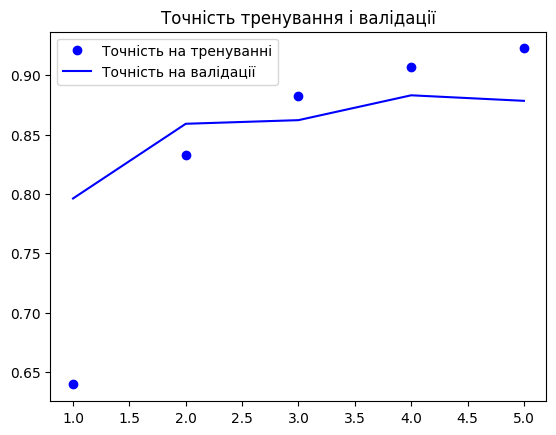

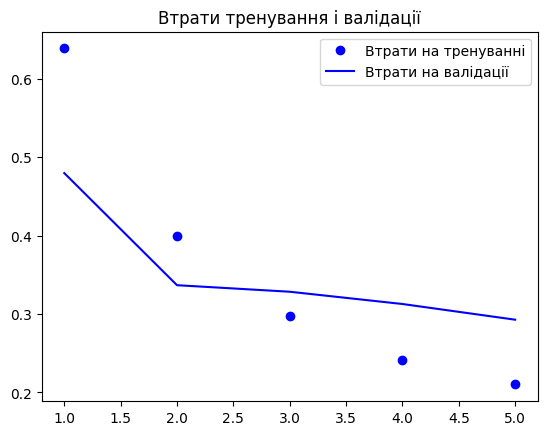

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки



In [20]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, перетворюємо в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння виведемо деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 6s 8ms/step - loss: 0.3039 - acc: 0.8732
Test Loss: 0.3038644790649414
Test Accuracy: 0.8731600046157837


модель LSTM навчається скоріше та має кращу точність при одинакових параметрах, спробуємо додати Bidirectional та збільшити глибину моделі

In [21]:
from keras.layers import Bidirectional

In [22]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [23]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [25]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [26]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # додали Bidirectional LSTM
model.add(LSTM(64, return_sequences=True))  # додали другий LSTM шар
model.add(LSTM(32))  # додали третій LSTM шар
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, None, 64)          16640     
 al)                                                             
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 382113 (1.46 MB)
Trainable params: 382113 (1.46 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 26s 146ms/step - loss: 0.6348 - acc: 0.6044 - val_loss: 0.4264 - val_acc: 0.8117
Epoch 2/5
137/137 [==============================] - 16s 116ms/step - loss: 0.3746 - acc: 0.8411 - val_loss: 0.3549 - val_acc: 0.8456
Epoch 3/5
137/137 [==============================] - 15s 108ms/step - loss: 0.2738 - acc: 0.8917 - val_loss: 0.3107 - val_acc: 0.8640
Epoch 4/5
137/137 [==============================] - 16s 114ms/step - loss: 0.2228 - acc: 0.9155 - val_loss: 0.3339 - val_acc: 0.8723
Epoch 5/5
137/137 [==============================] - 14s 102ms/step - loss: 0.1826 - acc: 0.9334 - val_loss: 0.3392 - val_acc: 0.8728


In [30]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, перетворюємо в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння виведемо деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 23s 27ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 22s 29ms/step - loss: 0.3532 - acc: 0.8670
Test Loss: 0.35320112109184265
Test Accuracy: 0.8670399785041809


Найкращу точність показала модель LSTM, збільшення глибини не покращило результат